# HEART DISEASE PREDICTION USING ML TECHNIQUES 

*by Tarun Varma Buddaraju, December, 2023* 

# Introduction

Cardiovascular disease is a rising cause of death globally and one of the most significant health issues of our time. This complex medical condition impacts the cardiovascular system and often presents challenges in diagnosis. However, the advent of Machine Learning (ML) algorithms in recent years has paved the way for more precise and efficient detection and treatment of heart disease. The aim of this project is to predict diagnostically whether a patient has cardiac/heart diabetes, based on specific diagnostic measurements included in the dataset, such as cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, etc. The dataset used in this project is sourced from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease).

# Loading appropriate libraries

In [417]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [418]:
df=pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

1.age: The person's age in years

2.sex: The person's sex (1 = male, 0 = female)

3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5.chol: The person's cholesterol measurement in mg/dl

6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach: The person's maximum heart rate achieved

9.exang: Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca: The number of major vessels (0-3)

13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target: Heart disease (0 = no, 1 = yes)


In [419]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Corelation

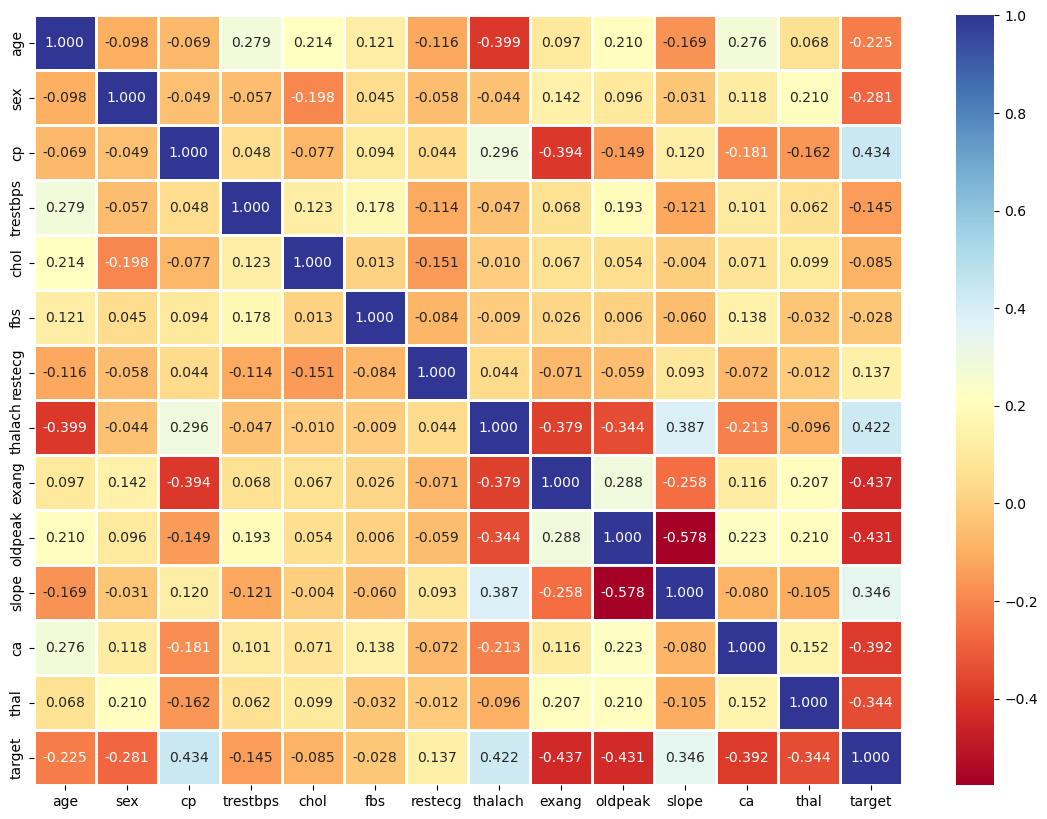

In [421]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu',fmt='.3f',linewidths=2)
plt.show()

In [422]:
df.groupby('cp',as_index=False)['target'].mean()

,cp,target
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [423]:
df.groupby('slope',as_index=False)['target'].mean()

,slope,target
0,0,0.428571
1,1,0.350000
2,2,0.753521


In [424]:
df.groupby('thal',as_index=False)['target'].mean()

,thal,target
0,0,0.500000
1,1,0.333333
2,2,0.783133
3,3,0.239316


In [425]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


C:\Users\91868\AppData\Local\Temp\ipykernel_15928\925223036.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'],rug=True)


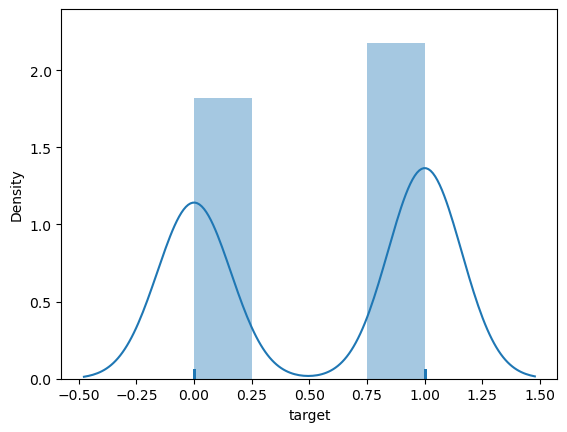

In [426]:
sns.distplot(df['target'],rug=True)
plt.show()

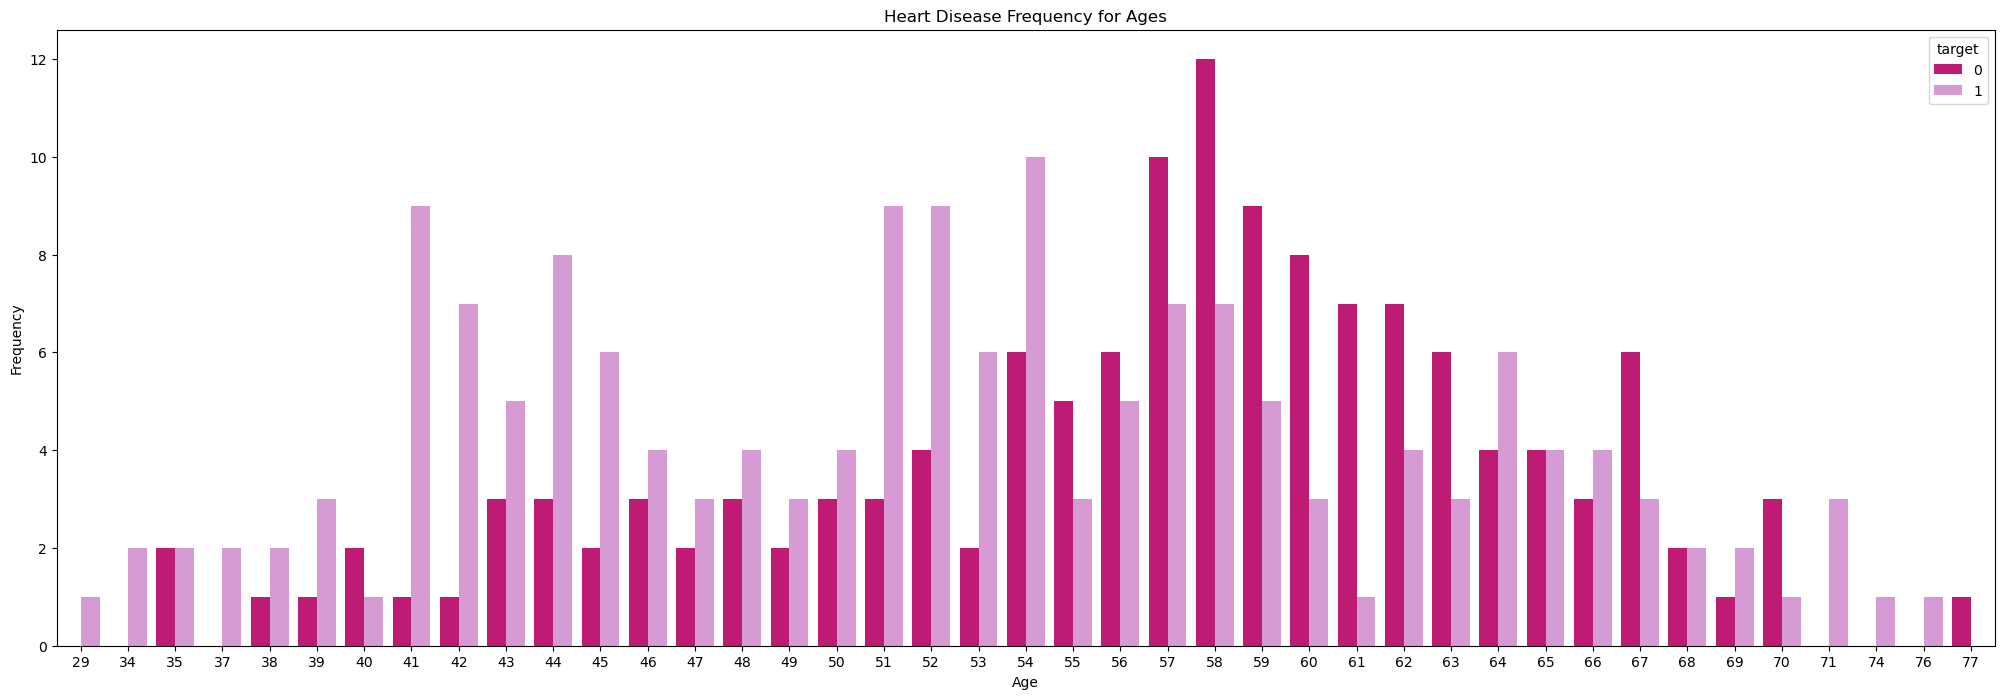

In [427]:
plt.figure(figsize=(25,8))
sns.countplot(x='age', hue='target', data=df, palette=['#d90077', '#e090df'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

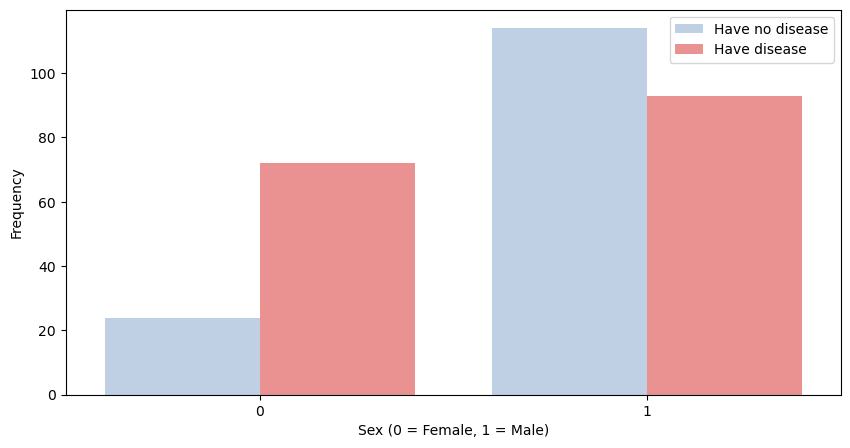

In [428]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex', hue='target', data=df, palette=['#b8cfec','#f98282'])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Have no disease", "Have disease"])
plt.ylabel('Frequency')
plt.show()

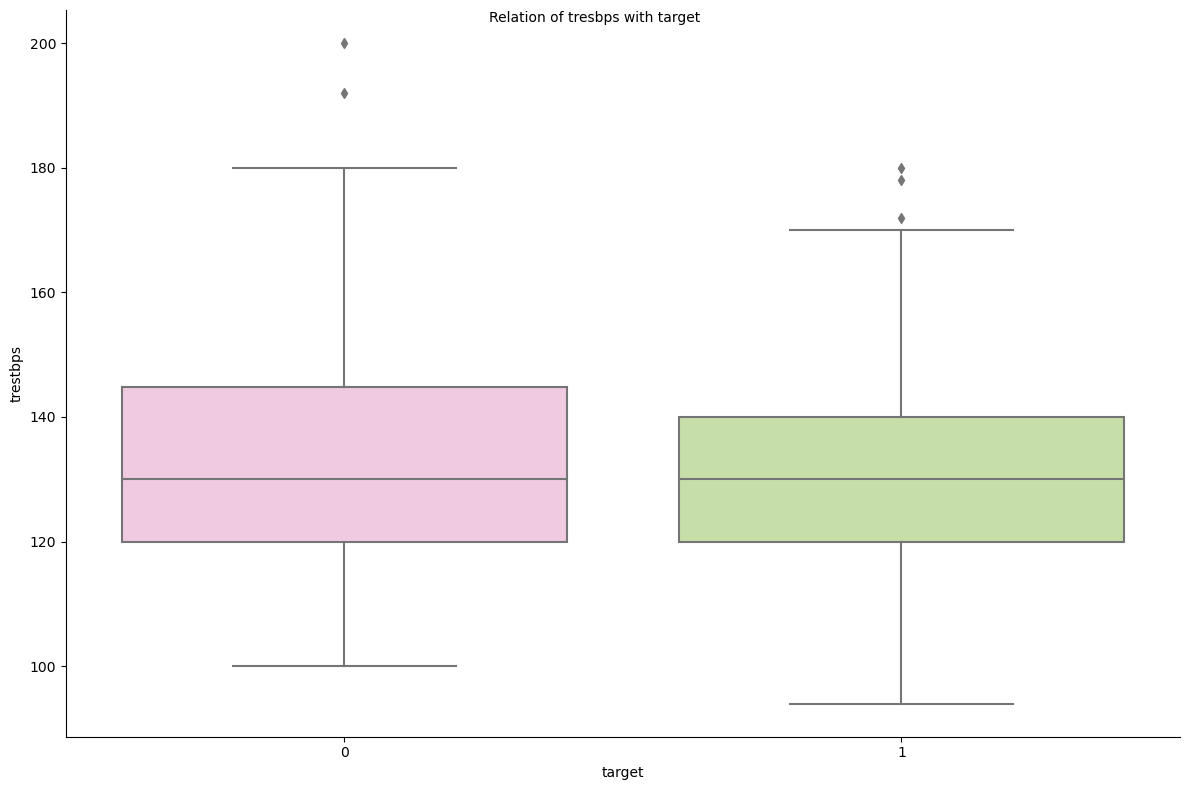

In [429]:
g = sns.catplot(x="target", y="trestbps", kind="box", data=df, height=8, aspect=1.5, palette='PiYG')
g.fig.suptitle('Relation of tresbps with target', fontsize=10)
plt.show()


The plot clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases.

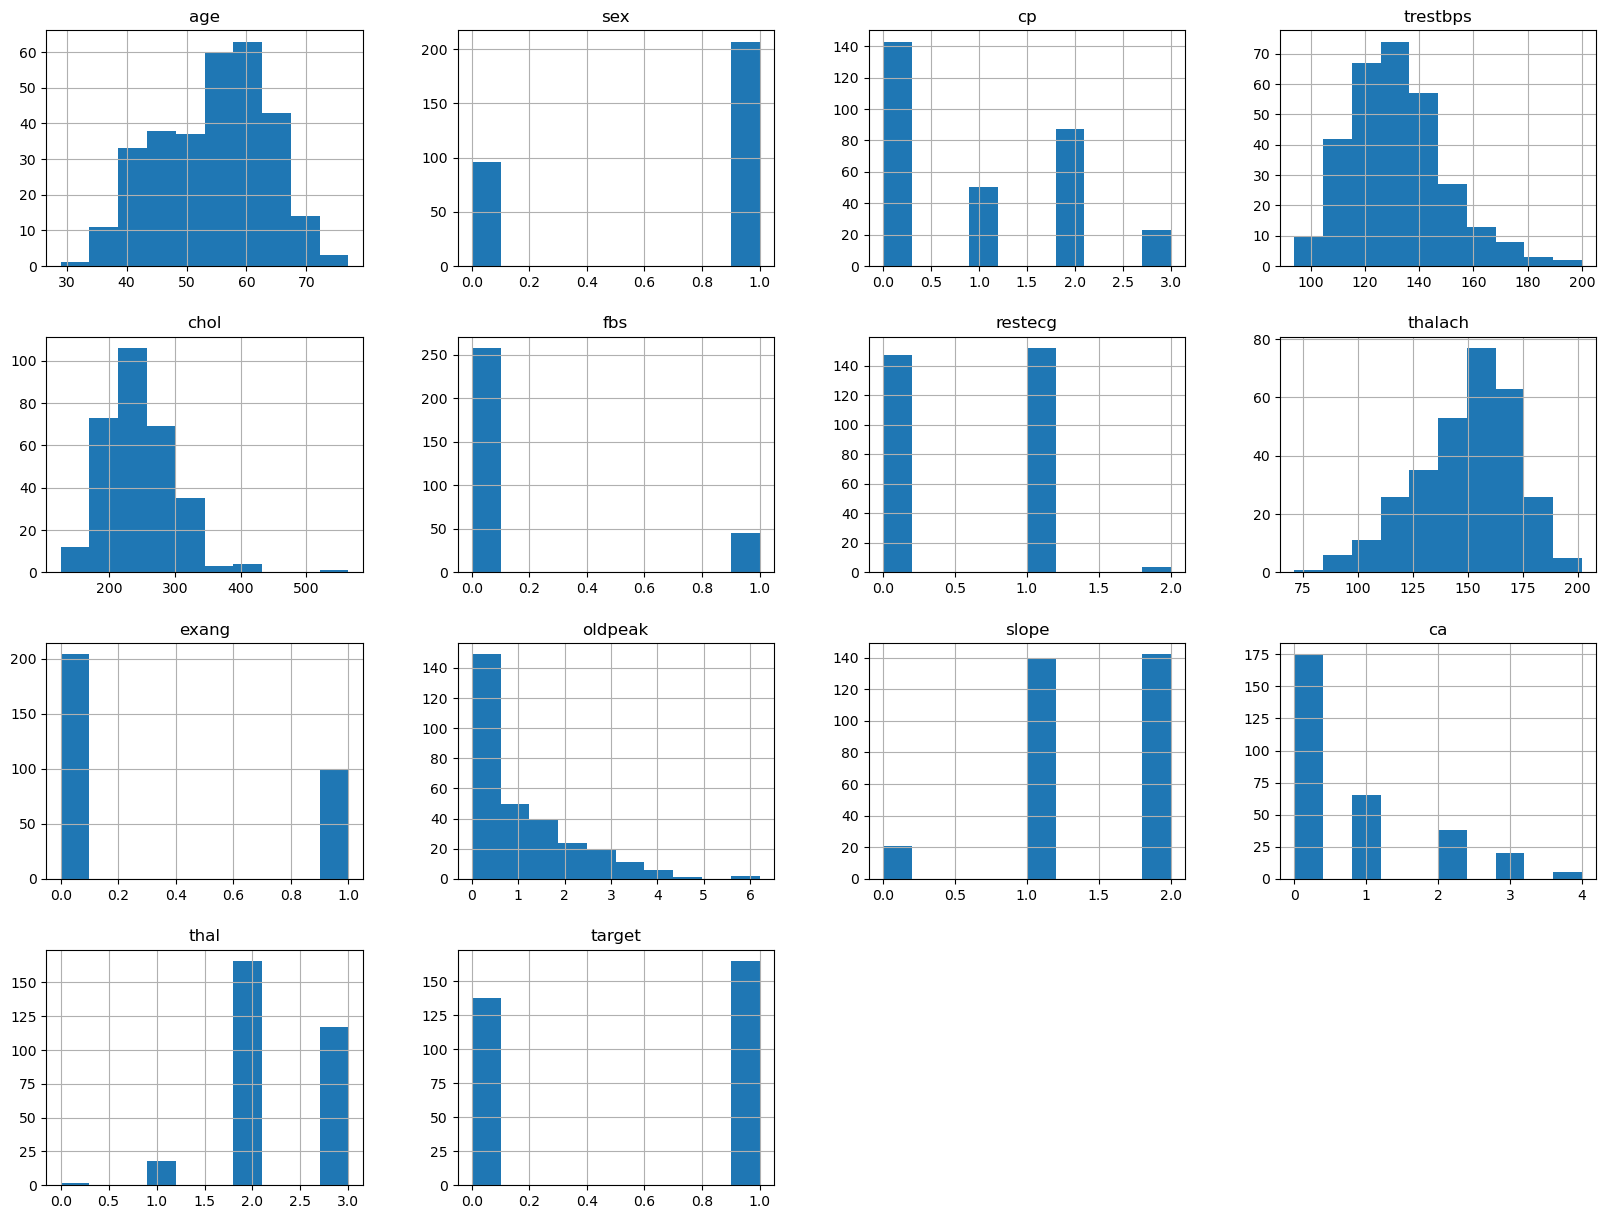

In [430]:
df.hist(bins=10, figsize=(20,15))
plt.show()


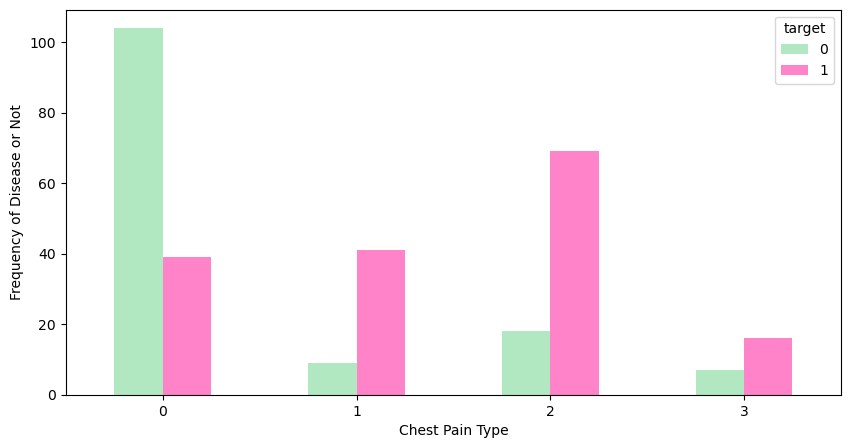

In [431]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['#b1e8c1','#ff83c8' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()


## Effect of parameters on Heart Disease based on Age

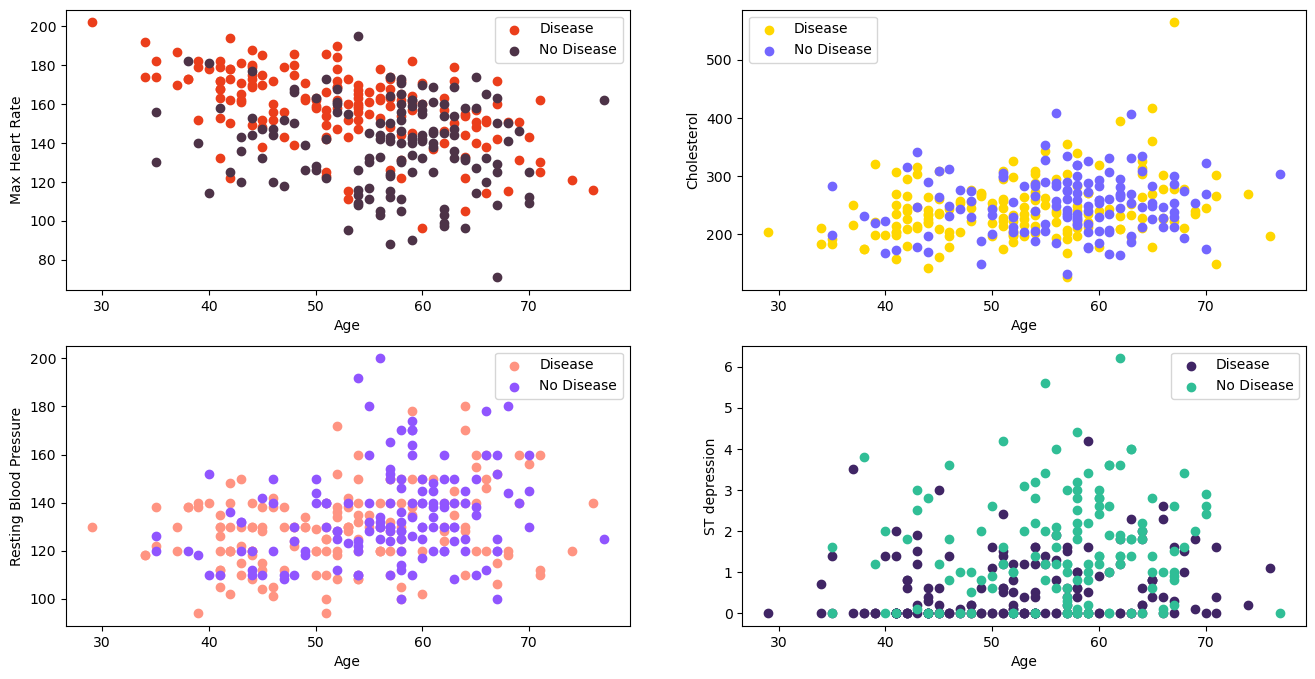

In [432]:
def create_subplot(position, y_var, y_label, color1, color2):
    plt.subplot(2, 2, position)
    plt.scatter(x=df.age[df.target==1], y=df[y_var][df.target==1], c=color1)
    plt.scatter(x=df.age[df.target==0], y=df[y_var][df.target==0], c=color2)
    plt.xlabel('Age')
    plt.ylabel(y_label)
    plt.legend(['Disease', 'No Disease'])

plt.figure(figsize=(16,8))

create_subplot(1, 'thalach', 'Max Heart Rate', '#eb3e1b', '#4d3347')
create_subplot(2, 'chol', 'Cholesterol', 'gold', '#7366ff')
create_subplot(3, 'trestbps', 'Resting Blood Pressure', '#ff9482', '#9055ff')
create_subplot(4, 'oldpeak', 'ST depression', '#402565', '#30be96')

plt.show()


## Creating Dummy Variables

In [433]:
chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chest_pain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
frames=[df,sp,th,rest_ecg]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal','restecg'],axis=1,inplace=True)

In [434]:
df.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,0,1,0


In [435]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [436]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [437]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Importing the Keras libraries and packages

In [438]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

## Keras neural network

Keras is a robust and user-friendly Python library designed for the creation and assessment of deep learning models. It encapsulates the efficient numerical computation libraries, Theano and TensorFlow, enabling you to establish and train neural network models with just a handful of lines of code.

<img src="pic2.jpg" style="width: 850px;"/>

## Initialising the ANN

By constructing your network below. We've already set up the structure and the backward pass. And my task is to implement the forward pass through the network. I will also be setting the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

The network consists of two layers: a hidden layer and an output layer. The hidden layer employs the sigmoid function for activations. The output layer has a single node used for regression, where the output of the node is identical to its input. In other words, the activation function is $f(x)=x$. An activation function is a function that takes an input signal, generates an output signal, but also considers the threshold. We traverse each layer of our network, computing the outputs for each neuron. All the outputs from one layer serve as inputs to the neurons in the subsequent layer. This procedure is known as forward propagation.

In a neural network, we use the weights to propagate signals from the input to the output layers. These weights are also used to propagate error in reverse from the output back into the network for weight updates. This process is referred to as backpropagation.

In [439]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 22))

# Adding the second hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


## Neuron

The fundamental building blocks of a neural network are neurons. When an artificial neuron is triggered, it calculates its state by summing up all the incoming inputs, each multiplied by its respective connection weight. However, neurons always have an additional input known as the bias, which is consistently set to 1 and possesses its own unique connection weight.

<img src="pic1.jpg" style="width: 750px;"/>


## Gradient Decent 

Gradient descent is an iterative optimization algorithm of the first order, used for locating the minimum of a function. In order to identify a local minimum of a function via gradient descent, one proceeds with steps that are proportional to the negative value of the gradient (or an approximate gradient) of the function at the present point.

<img src="pic3.png" style="width: 450px;"/>

## Backpropagation

Backpropagation, also known as backward propagation, is a crucial mathematical instrument for enhancing the precision of predictions in data mining and machine learning. Fundamentally, backpropagation is an algorithm employed for swift calculation of derivatives.

Artificial neural networks utilize backpropagation as a learning algorithm to perform a gradient descent in relation to weights. The desired outputs are juxtaposed with the outputs achieved by the system, following which the systems are fine-tuned by modifying the connection weights to minimize the discrepancy between the two as much as feasible. The algorithm derives its name from the fact that the weights are updated in a reverse manner, i.e., from output to input.

<img src="pic4.png" style="width: 900px;"/>

# Fitting the model

### Choose the number of epochs
This is the number of times the dataset will pass through the network, each time updating the weights. As the number of epochs increases, the network becomes better and better at predicting the targets in the training set. You'll need to choose enough epochs to train the network well but not too many or you'll be overfitting.

In [440]:
#classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)
classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000)


Epoch 1/1000
25/25 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5289
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5413
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5537
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.7727
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 0.8182
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.8512
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.8388
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8471
Epoch 9/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.8347
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8388

25/25 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.9132
Epoch 83/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.9132
Epoch 84/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.2454 - accuracy: 0.9132
Epoch 85/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9132
Epoch 86/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.9132
Epoch 87/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9132
Epoch 88/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9132
Epoch 89/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9174
Epoch 90/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9174
Epoch 91/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9132
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9752
Epoch 163/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9711
Epoch 164/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9793
Epoch 165/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9793
Epoch 166/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9752
Epoch 167/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9752
Epoch 168/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9711
Epoch 169/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9752
Epoch 170/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9793
Epoch 171/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.

25/25 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 243/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 244/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 245/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 246/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 247/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 248/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 1.0000
Epoch 249/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 250/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 251/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.

25/25 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 323/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 324/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 325/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 326/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 327/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 328/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 329/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 330/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 331/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.

25/25 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 403/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 404/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 405/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 406/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 407/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 408/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 409/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 410/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 411/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.

25/25 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 483/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 484/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 485/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 486/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 487/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 488/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 489/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 490/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 491/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.

25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 563/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 564/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 565/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 566/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 567/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 568/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 569/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 570/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 571/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.

25/25 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 643/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 644/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 645/1000
25/25 [==============================] - 0s 3ms/step - loss: 9.9848e-04 - accuracy: 1.0000
Epoch 646/1000
25/25 [==============================] - 0s 3ms/step - loss: 9.9188e-04 - accuracy: 1.0000
Epoch 647/1000
25/25 [==============================] - 0s 2ms/step - loss: 9.8551e-04 - accuracy: 1.0000
Epoch 648/1000
25/25 [==============================] - 0s 2ms/step - loss: 9.7958e-04 - accuracy: 1.0000
Epoch 649/1000
25/25 [==============================] - 0s 2ms/step - loss: 9.7309e-04 - accuracy: 1.0000
Epoch 650/1000
25/25 [==============================] - 0s 2ms/step - loss: 9.6498e-04 - accuracy: 1.0000
Epoch 651/1000
25/25 [==============================] - 0s 2ms/step - los

25/25 [==============================] - 0s 2ms/step - loss: 6.3160e-04 - accuracy: 1.0000
Epoch 720/1000
25/25 [==============================] - 0s 2ms/step - loss: 6.2835e-04 - accuracy: 1.0000
Epoch 721/1000
25/25 [==============================] - 0s 2ms/step - loss: 6.2445e-04 - accuracy: 1.0000
Epoch 722/1000
25/25 [==============================] - 0s 2ms/step - loss: 6.2034e-04 - accuracy: 1.0000
Epoch 723/1000
25/25 [==============================] - 0s 2ms/step - loss: 6.1681e-04 - accuracy: 1.0000
Epoch 724/1000
25/25 [==============================] - 0s 2ms/step - loss: 6.1218e-04 - accuracy: 1.0000
Epoch 725/1000
25/25 [==============================] - 0s 2ms/step - loss: 6.1056e-04 - accuracy: 1.0000
Epoch 726/1000
25/25 [==============================] - 0s 2ms/step - loss: 6.0612e-04 - accuracy: 1.0000
Epoch 727/1000
25/25 [==============================] - 0s 2ms/step - loss: 6.0243e-04 - accuracy: 1.0000
Epoch 728/1000
25/25 [==============================] - 0s 2m

25/25 [==============================] - 0s 2ms/step - loss: 3.8988e-04 - accuracy: 1.0000
Epoch 797/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.8727e-04 - accuracy: 1.0000
Epoch 798/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.8523e-04 - accuracy: 1.0000
Epoch 799/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.8289e-04 - accuracy: 1.0000
Epoch 800/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.7982e-04 - accuracy: 1.0000
Epoch 801/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.7693e-04 - accuracy: 1.0000
Epoch 802/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.7310e-04 - accuracy: 1.0000
Epoch 803/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.7033e-04 - accuracy: 1.0000
Epoch 804/1000
25/25 [==============================] - 0s 2ms/step - loss: 3.6765e-04 - accuracy: 1.0000
Epoch 805/1000
25/25 [==============================] - 0s 2m

25/25 [==============================] - 0s 2ms/step - loss: 2.3834e-04 - accuracy: 1.0000
Epoch 874/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3731e-04 - accuracy: 1.0000
Epoch 875/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3582e-04 - accuracy: 1.0000
Epoch 876/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3357e-04 - accuracy: 1.0000
Epoch 877/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3201e-04 - accuracy: 1.0000
Epoch 878/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.3031e-04 - accuracy: 1.0000
Epoch 879/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2872e-04 - accuracy: 1.0000
Epoch 880/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2714e-04 - accuracy: 1.0000
Epoch 881/1000
25/25 [==============================] - 0s 2ms/step - loss: 2.2845e-04 - accuracy: 1.0000
Epoch 882/1000
25/25 [==============================] - 0s 2m

25/25 [==============================] - 0s 2ms/step - loss: 1.4342e-04 - accuracy: 1.0000
Epoch 951/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4259e-04 - accuracy: 1.0000
Epoch 952/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4158e-04 - accuracy: 1.0000
Epoch 953/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4123e-04 - accuracy: 1.0000
Epoch 954/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.4053e-04 - accuracy: 1.0000
Epoch 955/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3936e-04 - accuracy: 1.0000
Epoch 956/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3845e-04 - accuracy: 1.0000
Epoch 957/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3905e-04 - accuracy: 1.0000
Epoch 958/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.3810e-04 - accuracy: 1.0000
Epoch 959/1000
25/25 [==============================] - 0s 2m

In [441]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

2/2 [==============================] - 0s 3ms/step


### Accuracy score: 

Accuracy of the model:  0.8688524590163934


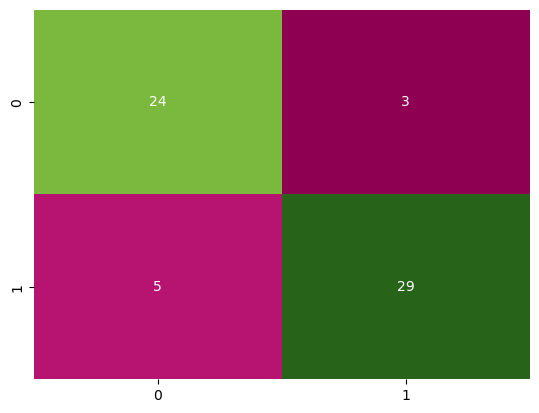

In [442]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="PiYG",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('Accuracy of the model: ',ac)

### Random Forest Classifier:

RandomForest_accuracy: 0.8032786885245902


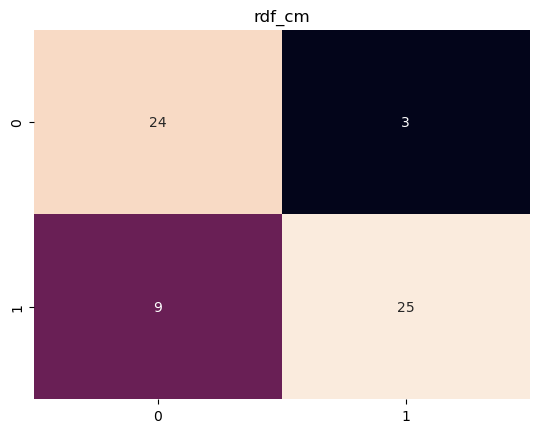

In [443]:
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

### K Neighbors Classifier:

KNN_accuracy: 0.8524590163934426


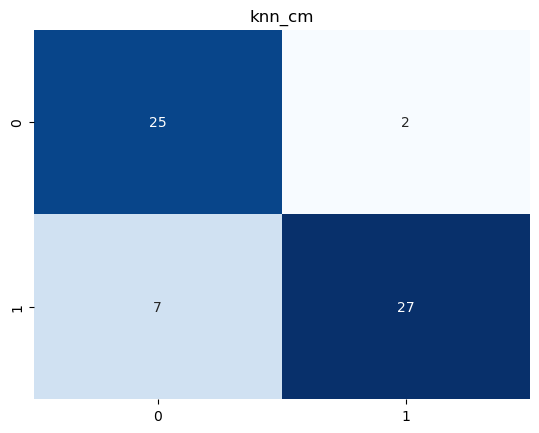

In [444]:
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn.predict(X_test)

# Generate a confusion matrix and calculate the accuracy
knn_cm = confusion_matrix(y_test, knn_pred)
knn_ac = accuracy_score(knn_pred, y_test)

# Plot the confusion matrix
plt.title("knn_cm")
sns.heatmap(knn_cm, annot=True, fmt="d", cbar=False, cmap='Blues')
print('KNN_accuracy:', knn_ac)


### Decision Tree Classifier: 

DecisionTree_accuracy: 0.819672131147541


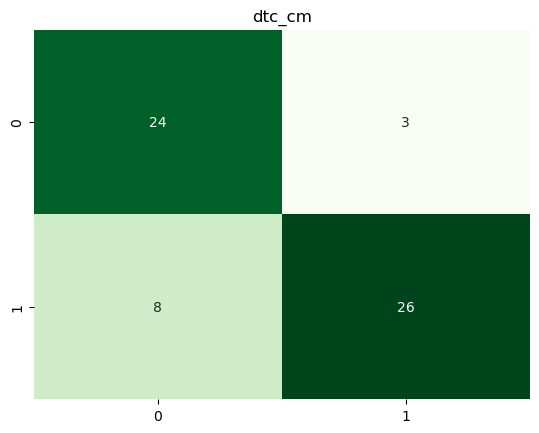

In [445]:
# Create an instance of DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train the classifier
dtc.fit(X_train, y_train)

# Make predictions on the test data
dtc_pred = dtc.predict(X_test)

# Generate a confusion matrix and calculate the accuracy
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_ac = accuracy_score(dtc_pred, y_test)

# Plot the confusion matrix
plt.title("dtc_cm")
sns.heatmap(dtc_cm, annot=True, fmt="d", cbar=False, cmap='Greens')
print('DecisionTree_accuracy:', dtc_ac)


### Naive Bayes:

NaiveBayes_accuracy: 0.8688524590163934


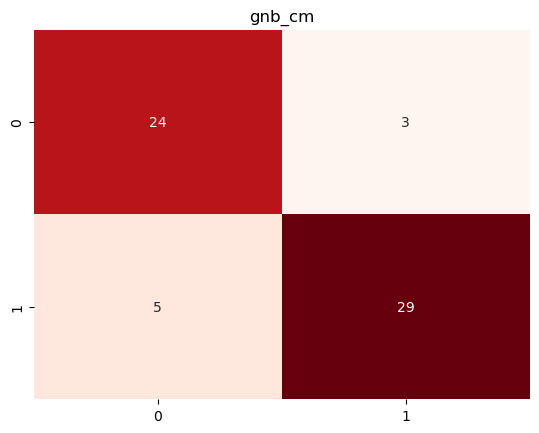

In [446]:
# Create an instance of GaussianNB
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test data
gnb_pred = gnb.predict(X_test)

# Generate a confusion matrix and calculate the accuracy
gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_ac = accuracy_score(gnb_pred, y_test)

# Plot the confusion matrix
plt.title("gnb_cm")
sns.heatmap(gnb_cm, annot=True, fmt="d", cbar=False, cmap='Reds')
print('NaiveBayes_accuracy:', gnb_ac)


### Precision-Recall curve and ROC (Receiver Operating Characteristic) curve:

<Figure size 640x480 with 0 Axes>

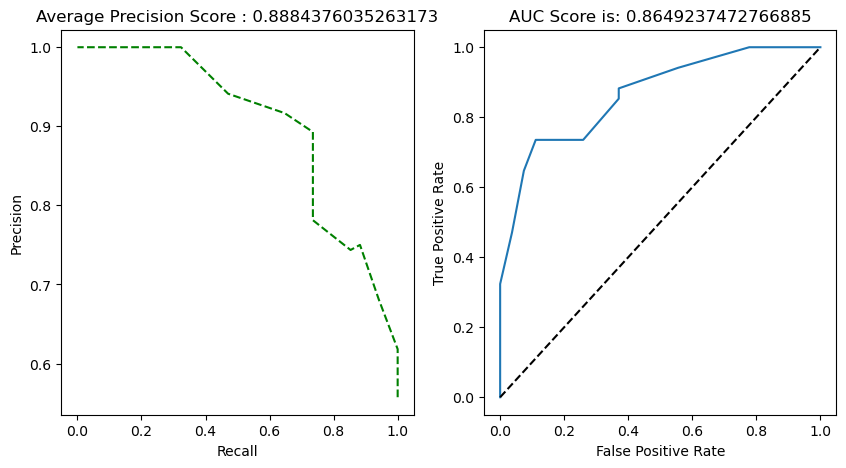

<Figure size 640x480 with 0 Axes>

In [447]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
%matplotlib inline
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
plotting(y_test,rdf_c.predict_proba(X_test))
plt.figure()   
    

The **ROC curve**, short for Receiver Operating Characteristic curve, illustrates the true positive rate (Sensitivity) against the false positive rate (100-Specificity) at various thresholds. Each point on this curve signifies a pair of sensitivity and specificity values that correspond to a unique decision threshold.

The area beneath an ROC curve is indicative of the test’s overall effectiveness, with a larger area signifying a more effective test. Hence, to assess the effectiveness of different tests, the areas under their respective ROC curves are compared. The term ROC is an acronym for Receiver Operating Characteristic.

### Model Accuracy :

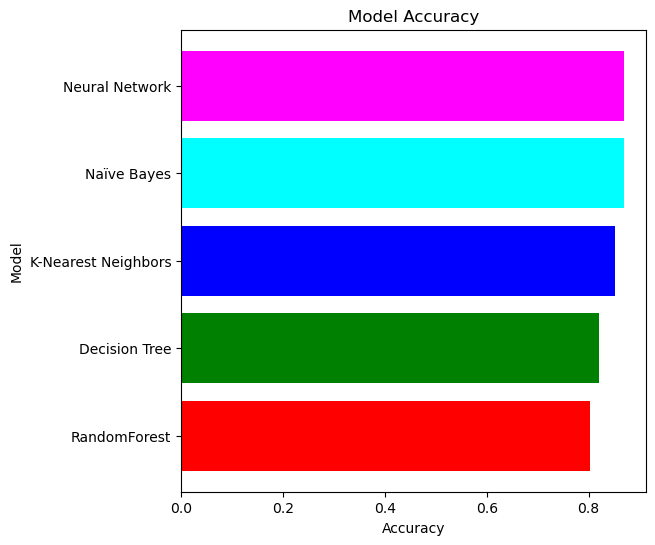

In [448]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for model accuracy
df_accuracy = pd.DataFrame({
    'Model': ['RandomForest', 'K-Nearest Neighbors', 'Decision Tree', 'Naïve Bayes', 'Neural Network'],
    'Accuracy': [rdf_ac, knn_ac, dtc_ac, gnb_ac, ac]
})

# Sort the DataFrame by accuracy
df_accuracy = df_accuracy.sort_values('Accuracy')

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.barh(df_accuracy['Model'], df_accuracy['Accuracy'], color=['red', 'green', 'blue', 'cyan', 'magenta'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()